# 목표 : IRIS 종 분류
- feature : 냅다 다 써보기
- target : variety

In [57]:
import pandas as pd
# 파일 경로 지정
data_file_path = '../data/iris.csv'    # .data 파일 경로

# .data 파일을 사용하여 데이터프레임 생성
df = pd.read_csv(data_file_path)# , names=column_names
df.iloc[:,:20].head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [58]:
df.describe() # 정규화, 표준화를 고려할 정도로 값의 차이가 크지 않음 

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
df.info() # null 값은 없네용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
object_cols = []
for idx, type_ in enumerate(df.dtypes):
    if type_ == "object":
        # print(f"{df.columns[idx]}")
        print(df.iloc[:,idx].value_counts())
        print("\n\n")
        object_cols.append(df.columns[idx])
# variety

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64





In [61]:
from sklearn.preprocessing import OrdinalEncoder # 카테고리를 텍스트에서 숫자로 

ordinal_encoder = OrdinalEncoder()

df["variety"] = ordinal_encoder.fit_transform(df[["variety"]])
df["variety"] = df["variety"].astype(int)
# encoded_df = ordinal_encoder.fit_transform(df[:,:-1]) 
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
# 상관관계
df.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width,variety
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal.length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal.width,0.817941,-0.366126,0.962865,1.000000,0.956547
variety,0.782561,-0.426658,0.949035,0.956547,1.000000


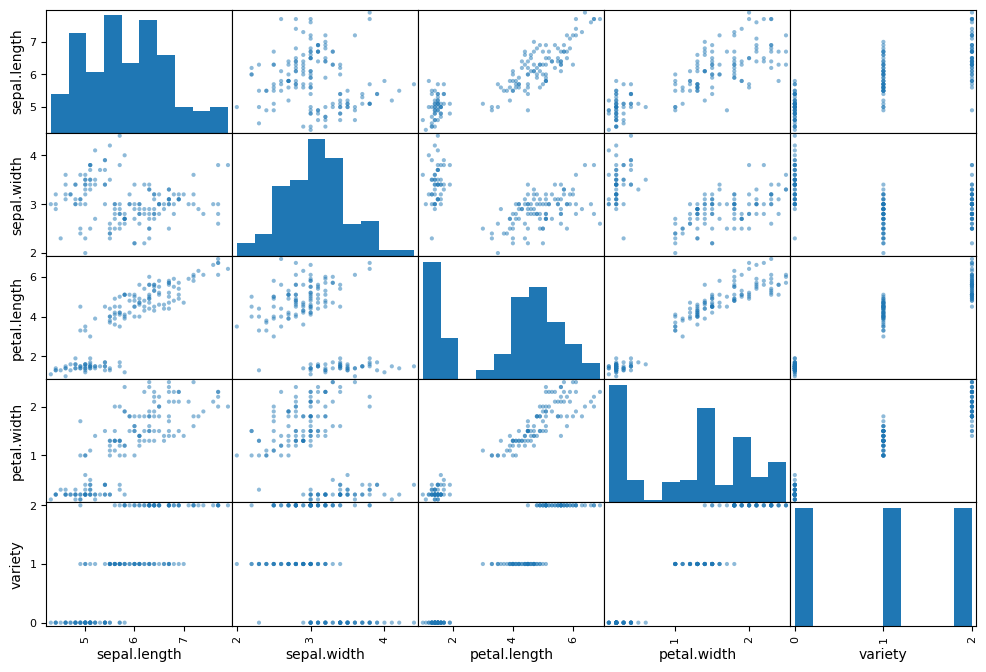

In [63]:
# 상관관계 시각화
from pandas.plotting import scatter_matrix

attributes = df.corr(numeric_only=True).index
df_scatter = scatter_matrix(df[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

sepal.width를 넣은 ver 안넣은 ver으로 나눠볼까...?  
일단 넣고 기릿

In [64]:
iris_df = df.copy()

In [65]:
# iris_df = iris_df.drop("sepal.width", axis=True)

## train_test 분리

In [66]:
from sklearn.model_selection import train_test_split

feature_DF = iris_df.iloc[:,:-1]
target_SR = iris_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(feature_DF, target_SR, stratify=target_SR, random_state=42)

<Axes: ylabel='Frequency'>

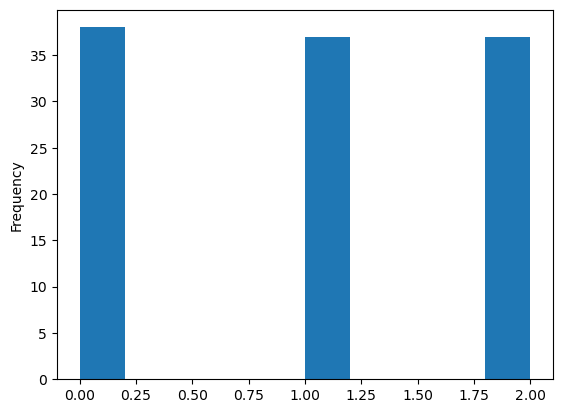

In [67]:
# 종별로 잘 분류됐는지 확인 
y_train.plot.hist()

<Axes: ylabel='Frequency'>

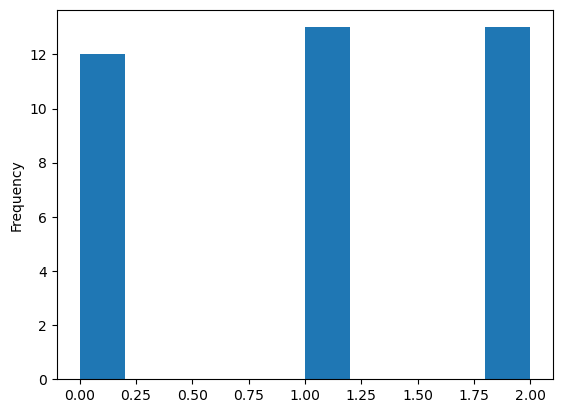

In [68]:
y_test.plot.hist()

In [69]:
print(f"[Train Dataset] {X_train.shape}, {y_train.shape}")
print(f"[Test Dataset] {X_test.shape}, {y_test.shape}")

[Train Dataset] (112, 4), (112,)
[Test Dataset] (38, 4), (38,)


## 학습
모델 선정
- 지도 학습
- 분류(calssification) 모델 : KNN, logistic

In [105]:
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [106]:
print(f"[Train Score] {model.score(X_train, y_train)}\n[Test Score] {model.score(X_test, y_test)}")

[Train Score] 0.9732142857142857
[Test Score] 0.9473684210526315


In [107]:
Logistic_pre = model.predict(X_test)

In [74]:
# pd.DataFrame({"예측치" : y_pred, "정답" : y_test})

# 

In [75]:
from sklearn.neighbors import KNeighborsClassifier # 기계학습 관련 모듈 

In [86]:
X_train.shape

(112, 4)

In [96]:
# X_train, X_test, y_train, y_test
max_k = X_train.shape[0]
test_scoreList = []
train_scoreList = []
for k in range(1, 30):
    
    KNN_model =  KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train, y_train)

    test_scoreList.append(KNN_model.score(X_train, y_train))
    train_scoreList.append(KNN_model.score(X_test, y_test))


In [104]:
# 학습 및 테스트 데이터에 대한 점수 확인
for i in range(len(test_scoreList)):
    print(f"{i+1}개의 이웃",test_scoreList[i], train_scoreList[i])

1개의 이웃 1.0 0.9473684210526315
2개의 이웃 0.9821428571428571 0.9210526315789473
3개의 이웃 0.9553571428571429 0.9736842105263158
4개의 이웃 0.9642857142857143 0.9736842105263158
5개의 이웃 0.9732142857142857 0.9736842105263158
6개의 이웃 0.9732142857142857 0.9473684210526315
7개의 이웃 0.9732142857142857 0.9473684210526315
8개의 이웃 0.9732142857142857 0.9473684210526315
9개의 이웃 0.9732142857142857 0.9736842105263158
10개의 이웃 0.9732142857142857 0.9736842105263158
11개의 이웃 0.9732142857142857 0.9736842105263158
12개의 이웃 0.9642857142857143 0.9736842105263158
13개의 이웃 0.9821428571428571 0.9473684210526315
14개의 이웃 0.9821428571428571 0.9473684210526315
15개의 이웃 0.9821428571428571 0.9473684210526315
16개의 이웃 0.9732142857142857 0.9473684210526315
17개의 이웃 0.9821428571428571 0.9473684210526315
18개의 이웃 0.9821428571428571 0.9473684210526315
19개의 이웃 0.9821428571428571 0.9473684210526315
20개의 이웃 0.9821428571428571 0.9473684210526315
21개의 이웃 0.9821428571428571 0.9473684210526315
22개의 이웃 0.9642857142857143 0.9473684210526315
23개의 이웃 0.97

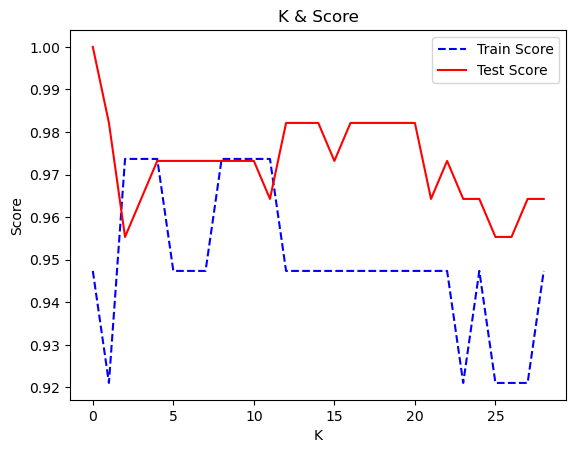

In [97]:
# K 갯수에  따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()

In [98]:
KNN_model = KNeighborsClassifier(n_neighbors = 10)

In [99]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [100]:
print(f"[Train Score] {KNN_model.score(X_train, y_train)}\n[Test Score] {KNN_model.score(X_test, y_test)}")

[Train Score] 0.9732142857142857
[Test Score] 0.9736842105263158


In [109]:
KNN_pre = KNN_model.predict(X_test)

# 

In [79]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train, y_train)

SVC()

In [80]:
print(f"[Train Score] {svc_model.score(X_train, y_train)}\n[Test Score] {svc_model.score(X_test, y_test)}")

[Train Score] 0.9732142857142857
[Test Score] 0.9210526315789473


In [110]:
svc_pre = svc_model.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율

for y_pred in [Logistic_pre, KNN_pre, svc_pre]:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision: {precision}")
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall: {recall}")
    print()

Accuracy: 0.9473684210526315
Precision: 0.9487179487179488
Recall: 0.9487179487179488

Accuracy: 0.9736842105263158
Precision: 0.9761904761904763
Recall: 0.9743589743589745

Accuracy: 0.9210526315789473
Precision: 0.9246031746031745
Recall: 0.923076923076923

